In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

## Task1

In [2]:
data = pd.read_pickle('data/train.pickle')
x = data['features'].reshape(data['features'].shape[0], -1)
y = data['labels']

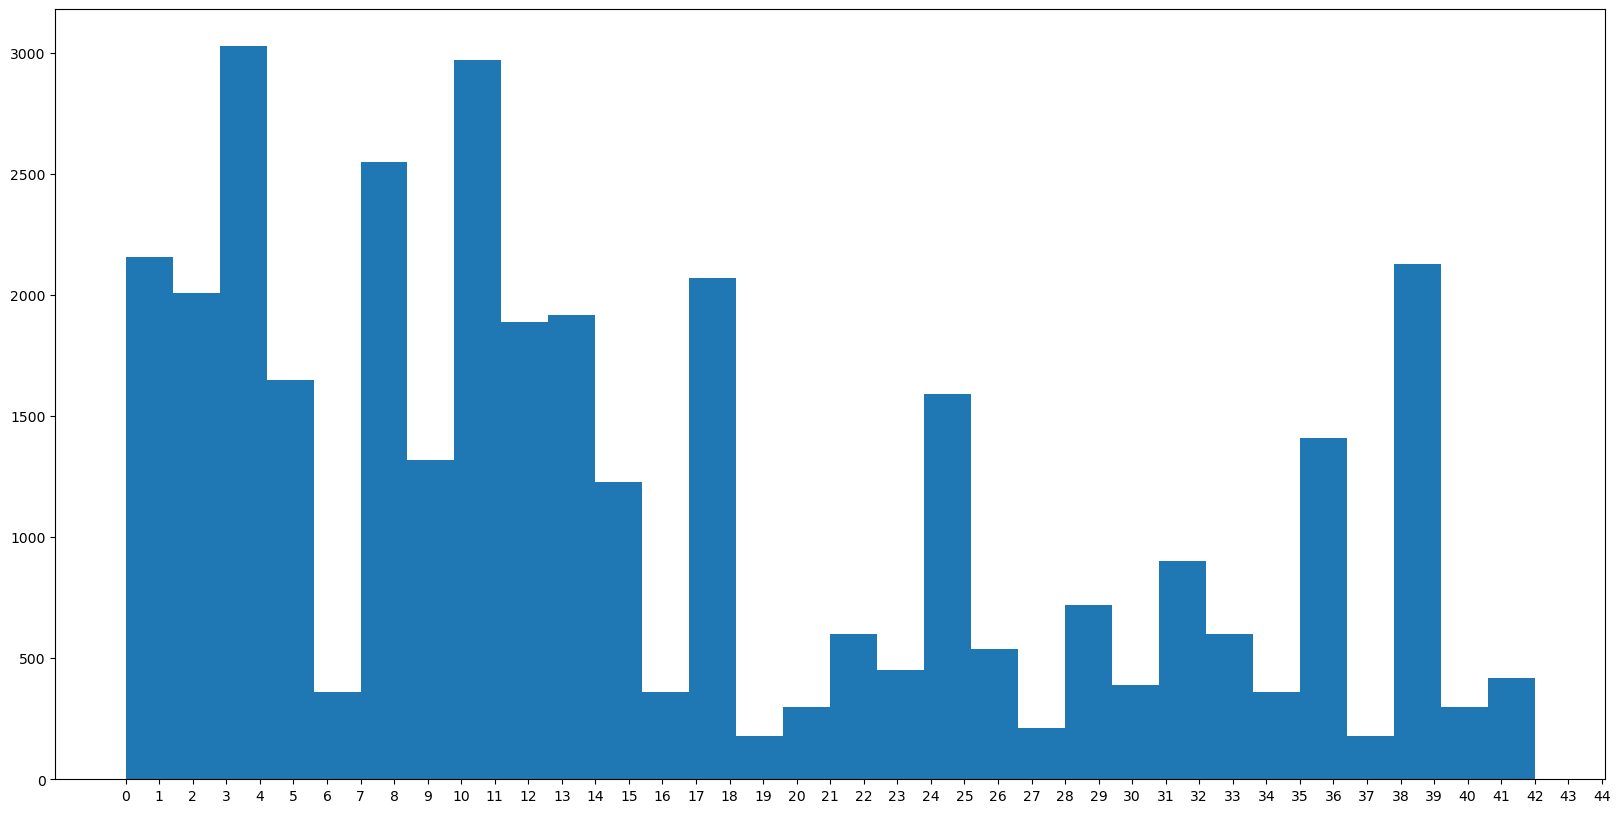

In [3]:
plt.figure(figsize=(20,10))
plt.hist(y, bins=30)
plt.xticks(list(range(45)))
plt.show()

из этого графика можем сделать вывод, что распределение классов неравномерное

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

# Отнормируем данные
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression(max_iter=90)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/root/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
accuracy_score(y_test, y_pred)

0.9393678160919541

In [6]:
precision_score(y_test, y_pred, average="weighted")

0.9398027948618665

In [7]:
precision_score(y_test, y_pred, average="macro")

0.9328320224471447

In [8]:
recall_score(y_test, y_pred, average="weighted")

0.9393678160919541

In [9]:
recall_score(y_test, y_pred, average="macro")

0.9288558390962967

Посмотрим на различные метрики и поймём, что наилучший результат выдаёт метрика precision, которая учитывает дисбаланс классов. \
Для нашей задачи лучше всего использовать именно её, так как мы хотим минимизировать количество ложноположительных результатов, \
то есть минимизировать количество дорожных знаков, которые попали не в тот класс

построим confusion_matrix

In [10]:
df_confusion = confusion_matrix(y_test, y_pred)
df_confusion

array([[ 29,   2,   1, ...,   0,   0,   0],
       [  0, 370,  11, ...,   0,   0,   0],
       [  1,   6, 401, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  60,   0,   0],
       [  0,   0,   0, ...,   0,  34,   0],
       [  0,   0,   0, ...,   0,   0,  36]])

<Figure size 1000x800 with 0 Axes>

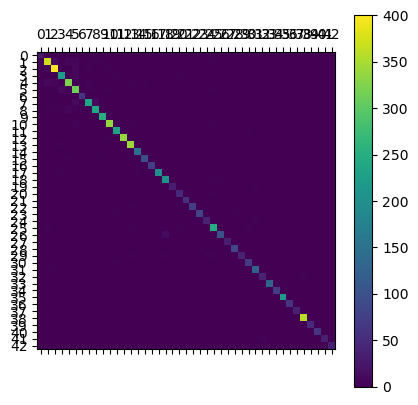

In [11]:
def plot_confusion_matrix(df_confusion):
    plt.figure(figsize=(10, 8))
    plt.matshow(df_confusion)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion))
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)

plot_confusion_matrix(df_confusion)

из этого видим, что чаще всего путает классы 3 и 5, а также 2 и 5, 4 и 5, 1 и 4, 1 и 2, 7 и 8.

## Task2

обучаем kNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
for k in list(range(2,6)):
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(k, accuracy_score(y_test, y_pred))

2 0.9079022988505747
3 0.9012931034482758
4 0.8875
5 0.8793103448275862


обучаем Наивный Байесовский классификатор

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.15862068965517243

обучаем SVC

In [14]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9584770114942529

In [15]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8814655172413793

Лучше всех: Support Vector Machine, с линейным ядром
Хуже всех: Наивный Байесовский классификатор

НБК оказалась худшей моделью скорее всего из-за того, что в алгоритме мы предполагаем независимость характеристик features, а у нас это не так.